In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("amazon_reviews.csv")
df

Unnamed: 0  reviewerName  ...  score_average_rating wilson_lower_bound
0              0           NaN  ...                   0.0                0.0
1              1          0mie  ...                   0.0                0.0
2              2           1K3  ...                   0.0                0.0
3              3           1m2  ...                   0.0                0.0
4              4  2&amp;1/2Men  ...                   0.0                0.0
...          ...           ...  ...                   ...                ...
4910        4910        ZM "J"  ...                   0.0                0.0
4911        4911            Zo  ...                   0.0                0.0
4912        4912     Z S Liske  ...                   0.0                0.0
4913        4913      Z Taylor  ...                   0.0                0.0
4914        4914           Zza  ...                   0.0                0.0

[4915 rows x 12 columns]

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB


In [4]:
df_sub = df[["reviewerName","overall","reviewText","reviewTime","day_diff"]]
df_sub 

reviewerName  overall  ...  reviewTime day_diff
0              NaN        4  ...  23/07/2014      138
1             0mie        5  ...  25/10/2013      409
2              1K3        4  ...  23/12/2012      715
3              1m2        5  ...  21/11/2013      382
4     2&amp;1/2Men        5  ...  13/07/2013      513
...            ...      ...  ...         ...      ...
4910        ZM "J"        1  ...  23/07/2013      503
4911            Zo        5  ...  22/08/2013      473
4912     Z S Liske        5  ...  31/03/2014      252
4913      Z Taylor        5  ...  16/09/2013      448
4914           Zza        5  ...  01/02/2014      310

[4915 rows x 5 columns]

In [5]:
df_sub.drop_duplicates()

reviewerName  overall  ...  reviewTime day_diff
0              NaN        4  ...  23/07/2014      138
1             0mie        5  ...  25/10/2013      409
2              1K3        4  ...  23/12/2012      715
3              1m2        5  ...  21/11/2013      382
4     2&amp;1/2Men        5  ...  13/07/2013      513
...            ...      ...  ...         ...      ...
4910        ZM "J"        1  ...  23/07/2013      503
4911            Zo        5  ...  22/08/2013      473
4912     Z S Liske        5  ...  31/03/2014      252
4913      Z Taylor        5  ...  16/09/2013      448
4914           Zza        5  ...  01/02/2014      310

[4915 rows x 5 columns]

In [6]:
df_sub.isnull() 

reviewerName  overall  reviewText  reviewTime  day_diff
0             True    False       False       False     False
1            False    False       False       False     False
2            False    False       False       False     False
3            False    False       False       False     False
4            False    False       False       False     False
...            ...      ...         ...         ...       ...
4910         False    False       False       False     False
4911         False    False       False       False     False
4912         False    False       False       False     False
4913         False    False       False       False     False
4914         False    False       False       False     False

[4915 rows x 5 columns]

In [7]:
df_sub.dropna()

reviewerName  overall  ...  reviewTime day_diff
1             0mie        5  ...  25/10/2013      409
2              1K3        4  ...  23/12/2012      715
3              1m2        5  ...  21/11/2013      382
4     2&amp;1/2Men        5  ...  13/07/2013      513
5          2Cents!        5  ...  29/04/2013      588
...            ...      ...  ...         ...      ...
4910        ZM "J"        1  ...  23/07/2013      503
4911            Zo        5  ...  22/08/2013      473
4912     Z S Liske        5  ...  31/03/2014      252
4913      Z Taylor        5  ...  16/09/2013      448
4914           Zza        5  ...  01/02/2014      310

[4913 rows x 5 columns]

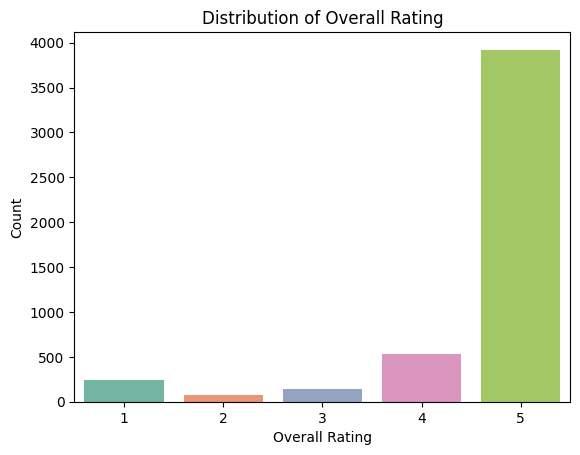

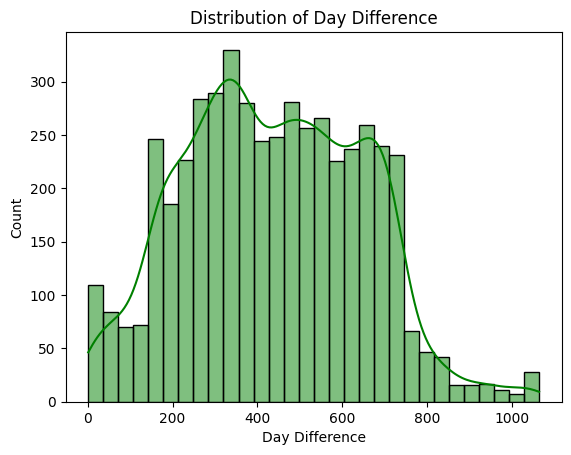

In [9]:
# Distribution of Overall Rating
sns.countplot(x='overall', data=df_sub, palette='Set2')
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

# Distribution of Day Difference
sns.histplot(df_sub['day_diff'], kde=True, bins=30, color='green')
plt.title('Distribution of Day Difference')
plt.xlabel('Day Difference')
plt.ylabel('Count')
plt.show()

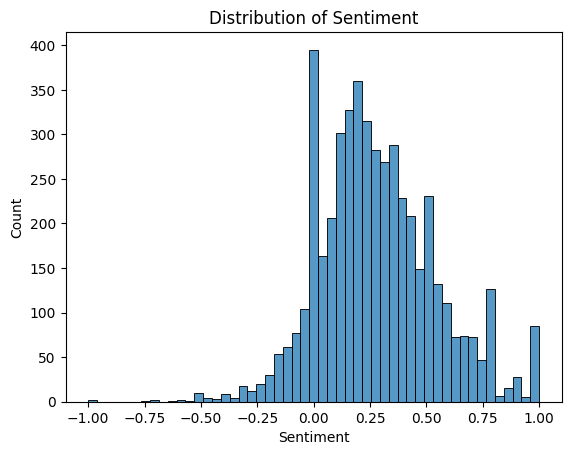

In [11]:
#Sentiment Analysis on the ReviewText column

from textblob import TextBlob

df_sub['sentiment'] = df_sub['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Distribution of Sentiment
sns.histplot(df_sub['sentiment'])
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
df_sub["sentiment"].mean()

0.2790277751380098

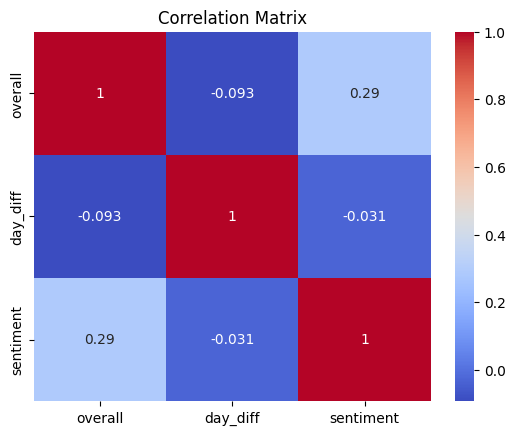

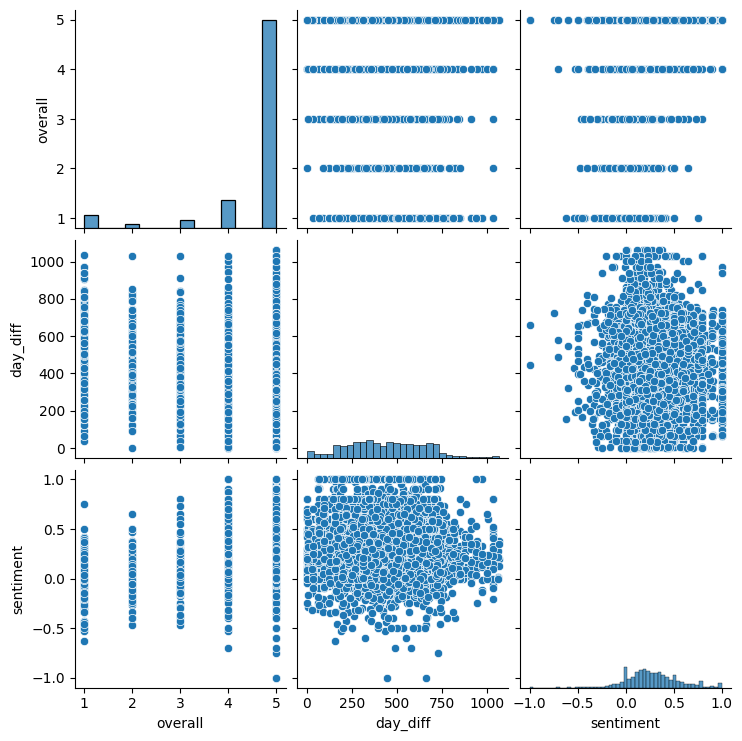

In [13]:
#Performing a correlation Analysis

# Correlation Matrix
corr = df_sub.corr()

# Heatmap of Correlation Matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot of Variables
sns.pairplot(df_sub, diag_kind='hist')
plt.show()